In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
andrewmvd_ocular_disease_recognition_odir5k_path = kagglehub.dataset_download('andrewmvd/ocular-disease-recognition-odir5k')

print('Data source import complete.')

# Step 1: Upload your kaggle.json
from google.colab import files
files.upload()  # Upload kaggle.json here

100%|██████████| 1.62G/1.62G [00:19<00:00, 88.1MB/s]

Extracting files...


Data source import complete.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noisebridge","key":"a00446b48d7f69daf226d0e40850f181"}'}

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras import backend as K
import gc

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 99% 1.61G/1.62G [00:07<00:00, 244MB/s]
100% 1.62G/1.62G [00:07<00:00, 238MB/s]


In [ ]:
!unzip ocular-disease-recognition-odir5k.zip

Streaming output truncated to the last 5000 lines.
  inflating: preprocessed_images/2179_left.jpg  
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_left.jpg  
  inflating

Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [1]:
fulldf = pd.read_csv("/content/full_df.csv")

NameError: name 'pd' is not defined

In [ ]:
fulldf.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


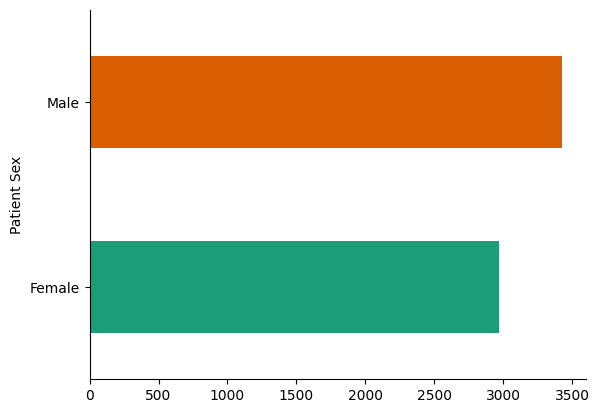

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fulldf.groupby('Patient Sex').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

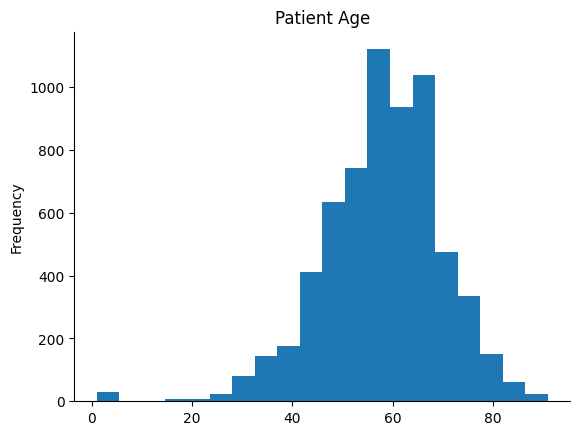

In [ ]:
fulldf['Patient Age'].plot(kind='hist', bins=20, title='Patient Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<function matplotlib.pyplot.gca() -> 'Axes'>

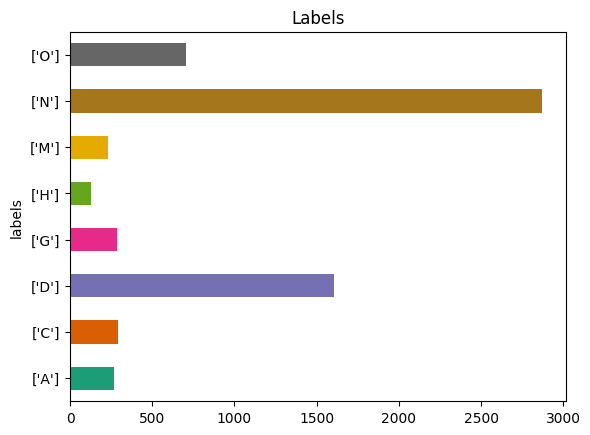

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fulldf.groupby('labels').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Labels')
plt.gca

In [ ]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [ ]:
print(fulldf.dtypes)

ID                            int64
Patient Age                   int64
Patient Sex                  object
Left-Fundus                  object
Right-Fundus                 object
Left-Diagnostic Keywords     object
Right-Diagnostic Keywords    object
N                             int64
D                             int64
G                             int64
C                             int64
A                             int64
H                             int64
M                             int64
O                             int64
filepath                     object
labels                       object
target                       object
filename                     object
dtype: object


In [ ]:
def has_condn(term, text):
    if term in text:
        return 1
    else:
        return 0

In [ ]:
fulldf.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
def process_dataset(data):

    data["left_cataract"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("cataract",x))
    data["right_cataract"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("cataract",x))

    data["LD"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy",x))
    data["RD"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy",x))

    data["LG"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma",x))
    data["RG"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma",x))

    data["LH"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive",x))
    data["RH"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive",x))

    data["LM"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("myopia",x))
    data["RM"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("myopia",x))

    data["LA"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration",x))
    data["RA"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration",x))

    data["LO"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("drusen",x))
    data["RO"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("drusen",x))

    left_cataract_images = data.loc[(data.C ==1) & (data.left_cataract == 1)]["Left-Fundus"].values
    right_cataract_images = data.loc[(data.C == 1) & (data.right_cataract == 1)]["Right-Fundus"].values

    left_normal = data.loc[(data.C == 0) & (data["Left-Diagnostic Keywords"] == "normal fundus")]['Left-Fundus'].sample(350,random_state=42).values
    right_normal = data.loc[(data.C == 0) & (data["Right-Diagnostic Keywords"] == "normal fundus")]['Right-Fundus'].sample(350,random_state=42).values

    left_diab = data.loc[(data.C == 0) & (data.LD == 1)]["Left-Fundus"].values
    right_diab = data.loc[(data.C == 0) & (data.RD == 1)]["Right-Fundus"].values

    left_glaucoma = data.loc[(data.C == 0) & (data.LG == 1)]["Left-Fundus"].values
    right_glaucoma = data.loc[(data.C == 0) & (data.RG == 1)]["Right-Fundus"].values

    left_hyper = data.loc[(data.C == 0) & (data.LH == 1)]["Left-Fundus"].values
    right_hyper = data.loc[(data.C == 0) & (data.RH == 1)]["Right-Fundus"].values

    left_myopia = data.loc[(data.C == 0) & (data.LM == 1)]["Left-Fundus"].values
    right_myopia = data.loc[(data.C == 0) & (data.RM == 1)]["Right-Fundus"].values

    left_age = data.loc[(data.C == 0) & (data.LA == 1)]["Left-Fundus"].values
    right_age = data.loc[(data.C == 0) & (data.RA == 1)]["Right-Fundus"].values

    left_other = data.loc[(data.C == 0) & (data.LO == 1)]["Left-Fundus"].values
    right_other = data.loc[(data.C == 0) & (data.RO == 1)]["Right-Fundus"].values

    normalones = np.concatenate((left_normal,right_normal),axis = 0);
    cataractones = np.concatenate((left_cataract_images,right_cataract_images),axis = 0);
    diabones = np.concatenate((left_diab,right_diab),axis = 0);
    glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis = 0);
    hyper = np.concatenate((left_hyper,right_hyper),axis = 0);
    myopia = np.concatenate((left_myopia,right_myopia),axis = 0);
    age = np.concatenate((left_age,right_age),axis=0);
    other = np.concatenate((left_other,right_other),axis = 0);

    return normalones,cataractones,diabones,glaucoma,hyper,myopia,age,other;

In [ ]:
normal , cataract , diab, glaucoma , hyper , myopia , age, other = process_dataset(fulldf);

print("Dataset stats::")
print("Normal ::" , len(normal))
print("Cataract ::" , len(cataract))
print("Diabetes ::" , len(diab))
print("Glaucoma ::" , len(glaucoma))
print("Hypertension ::" , len(hyper))
print("Myopia ::" , len(myopia))
print("Age Issues ::" , len(age))
print("Other ::" , len(other))

Dataset stats::
Normal :: 700
Cataract :: 594
Diabetes :: 1818
Glaucoma :: 610
Hypertension :: 374
Myopia :: 479
Age Issues :: 551
Other :: 324


In [ ]:
fulldf_encoded = pd.get_dummies(fulldf)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in fulldf.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    fulldf[column] = le.fit_transform(fulldf[column])
    label_encoders[column] = le

In [ ]:
print(fulldf.corr())

                                 ID  Patient Age  Patient Sex  Left-Fundus  \
ID                         1.000000    -0.148889     0.058814     0.164431   
Patient Age               -0.148889     1.000000    -0.092731    -0.098367   
Patient Sex                0.058814    -0.092731     1.000000     0.062598   
Left-Fundus                0.164431    -0.098367     0.062598     1.000000   
Right-Fundus               0.164431    -0.098367     0.062598     1.000000   
Left-Diagnostic Keywords   0.273698    -0.124416    -0.003409     0.076283   
Right-Diagnostic Keywords  0.230796    -0.127799     0.026403     0.044554   
N                          0.291838    -0.066672     0.032427    -0.184059   
D                          0.311308    -0.091023     0.030487     0.449841   
G                         -0.164544     0.100070     0.022536    -0.339314   
C                         -0.085556     0.190199    -0.061169    -0.194917   
A                         -0.187629     0.058467     0.003056   

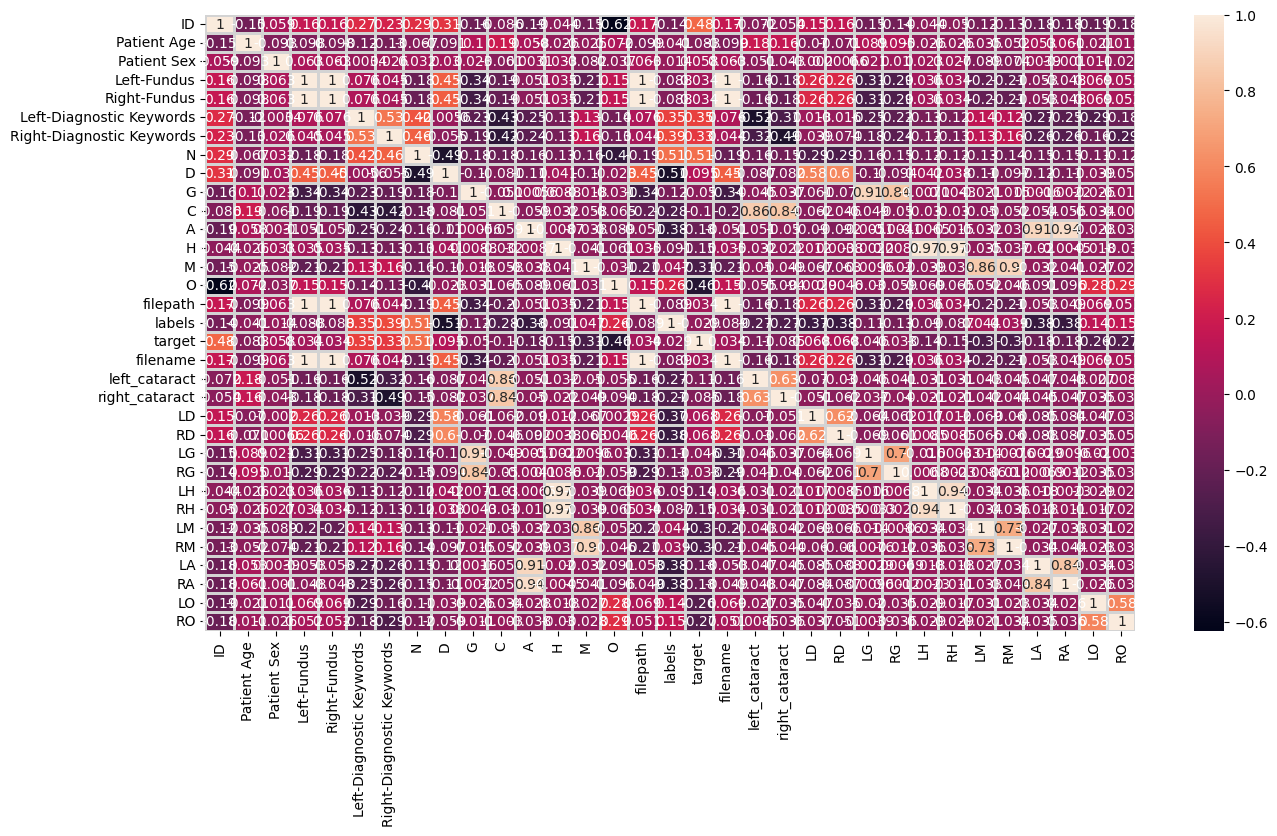

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(fulldf.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tqdm import tqdm
import cv2
import random

In [ ]:
dataset_dir = "/content/preprocessed_images"
image_size=224
labels = []
dataset = []
def data_gen(imagecategory , label):
    for img in tqdm(imagecategory):
        imgpath = os.path.join(dataset_dir,img);

        try:
            image = cv2.imread(imgpath,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue;
        dataset.append([np.array(image),np.array(label)]);
    random.shuffle(dataset);

    return dataset;

In [ ]:
dataset = data_gen(normal,0)
dataset = data_gen(cataract,1)
dataset = data_gen(diab,2)
dataset = data_gen(glaucoma,3)
dataset = data_gen(hyper,4)
dataset = data_gen(myopia,5)
dataset = data_gen(age,6)
dataset = data_gen(other,7)

len(dataset)

100%|██████████| 324/324 [00:00<00:00, 436.43it/s]


5396

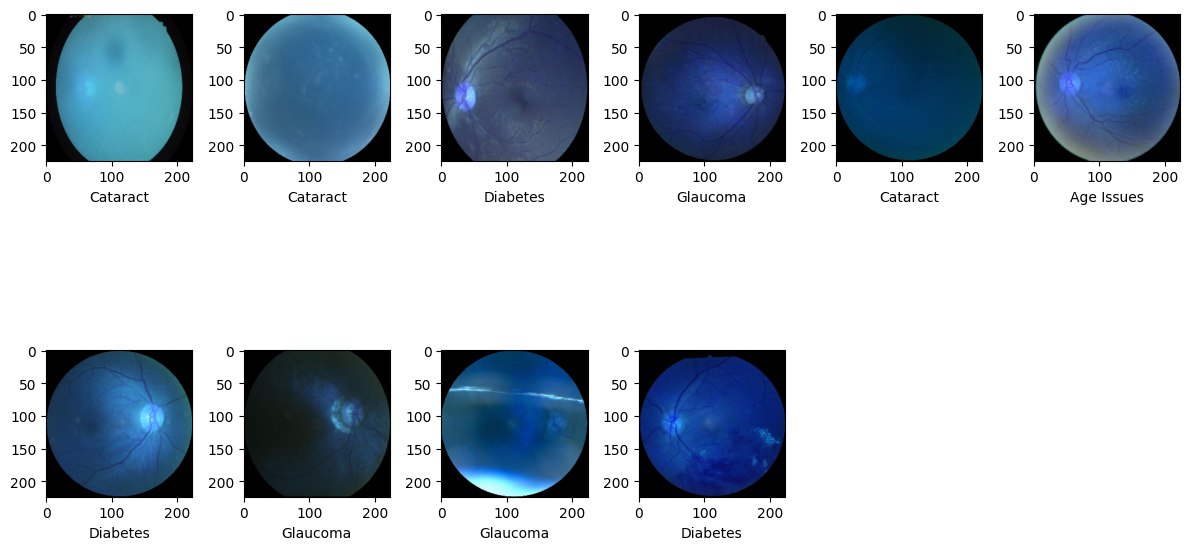

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]

    if category== 0:
        label = "Normal"
    elif category == 1 :
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"

    plt.subplot(2,6,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3);
train_y = np.array([i[1] for i in dataset])

x_train, x_temp, y_train, y_temp = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


y_train_cat = to_categorical(y_train, num_classes=8)
y_val_cat = to_categorical(y_val, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

Oversampling samples testing


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import numpy as np
from collections import Counter

# Assuming dataset is already created from your data_gen function
train_x = np.array([i[0] for i in dataset]).reshape(-1, image_size, image_size, 3)
train_y = np.array([i[1] for i in dataset])

# Print dataset size before oversampling
print("Dataset Size Before Oversampling:")
class_counts_before = Counter(train_y)
class_names = ['Normal', 'Cataract', 'Diabetes', 'Glaucoma', 'Hypertension', 'Myopia', 'Age Issues', 'Other']
for i, name in enumerate(class_names):
    print(f"{name}: {class_counts_before[i]} images")

# Perform SMOTE oversampling with custom sampling strategy
def perform_mlso(x_data, y_data, sampling_ratio=0.3, max_samples_per_class=500):
    """
    Performs SMOTE oversampling with a custom sampling strategy to balance classes.

    Args:
        x_data (numpy array): Input image data.
        y_data (numpy array): Labels.
        sampling_ratio (float): Ratio of majority class size to set minimum samples.
        max_samples_per_class (int): Maximum samples per class.

    Returns:
        x_resampled (numpy array): Oversampled image data.
        y_resampled (numpy array): Oversampled labels.
    """
    # Flatten image data for SMOTE compatibility
    x_flat = x_data.reshape((x_data.shape[0], -1))

    # Define custom sampling strategy
    class_counts = Counter(y_data)
    max_class_size = int(max(class_counts.values()) * sampling_ratio)  # e.g., 0.3 * 1789 ≈ 537
    sampling_strategy = {i: max(count, min(max_class_size, max_samples_per_class))
                        for i, count in class_counts.items()}

    # Perform SMOTE
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=3)
    x_resampled_flat, y_resampled = smote.fit_resample(x_flat, y_data)

    # Reshape back to original dimensions
    x_resampled = x_resampled_flat.reshape((-1, 224, 224, 3))

    return x_resampled, y_resampled

# Apply SMOTE to training data
x_train_resampled, y_train_resampled = perform_mlso(train_x, train_y)

# Print dataset size after oversampling
print("\nDataset Size After Oversampling:")
class_counts_after = Counter(y_train_resampled)
for i, name in enumerate(class_names):
    print(f"{name}: {class_counts_after.get(i, 0)} images")

# Print total dataset size
print(f"\nTotal images before oversampling: {len(train_y)}")
print(f"Total images after oversampling: {len(y_train_resampled)}")

Dataset Size Before Oversampling:
Normal: 700 images
Cataract: 588 images
Diabetes: 1789 images
Glaucoma: 607 images
Hypertension: 373 images
Myopia: 473 images
Age Issues: 551 images
Other: 315 images

Dataset Size After Oversampling:
Normal: 700 images
Cataract: 588 images
Diabetes: 1789 images
Glaucoma: 607 images
Hypertension: 500 images
Myopia: 500 images
Age Issues: 551 images
Other: 500 images

Total images before oversampling: 5396
Total images after oversampling: 5735


________________________________________________________________________________


Oversampling Code

In [3]:
# Install required libraries
!pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import gc

# Define MLSOL function with corrected sampling strategy
def perform_mlso(x_data, y_data, sampling_ratio=0.5):
    """
    Performs MLSOL with partial oversampling to address class imbalance.

    Args:
        x_data (numpy array): Input data (features/images).
        y_data (numpy array): Labels associated with the data.
        sampling_ratio (float): Fraction of majority class size to target for minority classes.

    Returns:
        x_resampled (numpy array): Resampled feature set.
        y_resampled (numpy array): Resampled labels.
    """
    # Flatten image data for SMOTE compatibility
    x_flat = x_data.reshape((x_data.shape[0], -1))

    # Calculate sampling strategy to limit oversampling
    class_counts = np.bincount(y_data)
    max_class_size = int(max(class_counts) * sampling_ratio)

    # Ensure target size is at least the original class size
    sampling_strategy = {
        i: max(count, max_class_size) for i, count in enumerate(class_counts) if i in np.unique(y_data)
    }

    # Perform SMOTE oversampling with k_neighbors adjusted for smaller classes
    smote = SMOTE(random_state=42, k_neighbors=3, sampling_strategy=sampling_strategy)
    x_resampled_flat, y_resampled = smote.fit_resample(x_flat, y_data)

    # Reshape the data back to original dimensions
    x_resampled = x_resampled_flat.reshape((-1, 224, 224, 3))

    return x_resampled, y_resampled

# Prepare the full dataset
train_x = np.array([i[0] for i in dataset]).reshape(-1, image_size, image_size, 3)
train_y = np.array([i[1] for i in dataset])

# Define K-fold cross-validation
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store metrics
fold_accuracies = []
fold_val_accuracies = []

ERROR: Operation cancelled by user


NameError: name 'dataset' is not defined

K-Fold Cross Validation with oversampling

In [ ]:
# Create the VGG19 model once
def create_vgg19_model():
    vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
    for layer in vgg19.layers:
        layer.trainable = False
    flat = tf.keras.layers.Flatten()(vgg19.output)
    dense1 = tf.keras.layers.Dense(256, activation="relu")(flat)
    dense2 = tf.keras.layers.Dense(256, activation="relu")(dense1)
    output = tf.keras.layers.Dense(8, activation="softmax")(dense2)
    model = tf.keras.models.Model(inputs=[vgg19.input], outputs=[output])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# K-fold cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(train_x, train_y)):
    print(f"\nTraining Fold {fold + 1}/{n_splits}...")

    # Split data into training and validation sets
    x_train = train_x[train_idx]
    y_train = train_y[train_idx]
    x_val = train_x[val_idx]
    y_val = train_y[val_idx]

    # Apply MLSOL to training data with partial oversampling
    x_train_resampled, y_train_resampled = perform_mlso(x_train, y_train, sampling_ratio=0.5)

    # Shuffle the resampled training data
    x_train_resampled, y_train_resampled = shuffle(x_train_resampled, y_train_resampled, random_state=42)

    # Convert labels to categorical
    y_train_resampled_cat = to_categorical(y_train_resampled, num_classes=8)
    y_val_cat = to_categorical(y_val, num_classes=8)

    # Create a fresh model for each fold
    final_vgg19 = create_vgg19_model()

    # Define early stopping callback with reduced patience
    early_stopping_callback = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        verbose=1,
        restore_best_weights=True,
        mode='max'
    )

    # Train the model
    history = final_vgg19.fit(
        x_train_resampled,
        y_train_resampled_cat,
        validation_data=(x_val, y_val_cat),
        batch_size=32,
        epochs=20,
        callbacks=[early_stopping_callback],
        verbose=1
    )

    # Evaluate the model
    train_loss, train_accuracy = final_vgg19.evaluate(x_train_resampled, y_train_resampled_cat, verbose=0)
    val_loss, val_accuracy = final_vgg19.evaluate(x_val, y_val_cat, verbose=0)

    print(f"Fold {fold + 1} - Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Fold {fold + 1} - Validation Accuracy: {val_accuracy * 100:.2f}%")

    fold_accuracies.append(train_accuracy)
    fold_val_accuracies.append(val_accuracy)

    # Clear memory
    tf.keras.backend.clear_session()
    gc.collect()

# Compute average accuracies
mean_train_accuracy = np.mean(fold_accuracies) * 100
mean_val_accuracy = np.mean(fold_val_accuracies) * 100
std_val_accuracy = np.std(fold_val_accuracies) * 100

print(f"\nK-fold Cross-Validation Results:")
print(f"Average Training Accuracy: {mean_train_accuracy:.2f}%")
print(f"Average Validation Accuracy: {mean_val_accuracy:.2f}% (±{std_val_accuracy:.2f}%)")


Training Fold 1/5...
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 76s 309ms/step - accuracy: 0.3548 - loss: 13.9727 - val_accuracy: 0.4370 - val_loss: 1.5291
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.6337 - loss: 1.1071 - val_accuracy: 0.5491 - val_loss: 1.3426
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.7038 - loss: 0.8931 - val_accuracy: 0.5907 - val_loss: 1.2507
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.7968 - loss: 0.6155 - val_accuracy: 0.6130 - val_loss: 1.3454
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.8425 - loss: 0.4963 - val_accuracy: 0.6296 - val_loss: 1.2452
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - accuracy: 0.8660 - loss: 0.4142 - val_accuracy: 0.6648 - val_loss: 1.2225
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 84s 262ms/step - accuracy: 0.8801 - loss: 0.3892 - val_accuracy: 0.7741 - val_loss: 0.9066
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - accuracy: 0.8939 - loss: 0.3448 - va

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 67s 321ms/step - accuracy: 0.3694 - loss: 12.4926 - val_accuracy: 0.5097 - val_loss: 1.4031
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 69s 260ms/step - accuracy: 0.6384 - loss: 1.0878 - val_accuracy: 0.6108 - val_loss: 1.2963
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.7557 - loss: 0.7253 - val_accuracy: 0.6284 - val_loss: 1.2025
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.7721 - loss: 0.6953 - val_accuracy: 0.6330 - val_loss: 1.2511
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.8069 - loss: 0.6093 - val_accuracy: 0.6302 - val_loss: 1.3151
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.8714 - loss: 0.4104 - val_accuracy: 0.6719 - val_loss: 1.3601
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.8608 - loss: 0.4389 - val_accuracy: 0.6627 - val_loss: 1.3793
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - accuracy: 0.9079 - loss: 0.3017 - va

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 57s 270ms/step - accuracy: 0.3571 - loss: 11.8455 - val_accuracy: 0.4143 - val_loss: 1.7271
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 255ms/step - accuracy: 0.6230 - loss: 1.1439 - val_accuracy: 0.5542 - val_loss: 1.4546
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - accuracy: 0.7157 - loss: 0.8680 - val_accuracy: 0.5978 - val_loss: 1.4334
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - accuracy: 0.8055 - loss: 0.5930 - val_accuracy: 0.6376 - val_loss: 1.1802
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - accuracy: 0.8423 - loss: 0.5099 - val_accuracy: 0.6793 - val_loss: 1.6280
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 78s 246ms/step - accuracy: 0.8692 - loss: 0.4613 - val_accuracy: 0.7062 - val_loss: 1.1659
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 85s 260ms/step - accuracy: 0.8888 - loss: 0.3850 - val_accuracy: 0.6673 - val_loss: 1.3829
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - accuracy: 0.8160 - loss: 0.7661 - va

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 61s 289ms/step - accuracy: 0.3746 - loss: 9.6661 - val_accuracy: 0.5403 - val_loss: 1.3682
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 239ms/step - accuracy: 0.6053 - loss: 1.2141 - val_accuracy: 0.6126 - val_loss: 1.0948
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 49s 243ms/step - accuracy: 0.7339 - loss: 0.8237 - val_accuracy: 0.6265 - val_loss: 1.1175
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 257ms/step - accuracy: 0.7974 - loss: 0.6057 - val_accuracy: 0.6562 - val_loss: 1.2205
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.8304 - loss: 0.5218 - val_accuracy: 0.6905 - val_loss: 1.1178
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.8522 - loss: 0.4608 - val_accuracy: 0.7442 - val_loss: 0.9364
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 259ms/step - accuracy: 0.8813 - loss: 0.3764 - val_accuracy: 0.7118 - val_loss: 0.9289
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.8695 - loss: 0.4313 - val

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 57s 271ms/step - accuracy: 0.3702 - loss: 11.1622 - val_accuracy: 0.5394 - val_loss: 1.3246
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 79s 260ms/step - accuracy: 0.6207 - loss: 1.1592 - val_accuracy: 0.5598 - val_loss: 1.3183
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.7811 - loss: 0.6587 - val_accuracy: 0.6478 - val_loss: 1.0877
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.7963 - loss: 0.6151 - val_accuracy: 0.6580 - val_loss: 1.2040
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.8604 - loss: 0.4344 - val_accuracy: 0.7173 - val_loss: 1.0015
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 79s 246ms/step - accuracy: 0.9005 - loss: 0.3328 - val_accuracy: 0.7349 - val_loss: 1.0512
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 238ms/step - accuracy: 0.9185 - loss: 0.2715 - val_accuracy: 0.7081 - val_loss: 1.2373
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 87s 262ms/step - accuracy: 0.8952 - loss: 0.3548 - va

Model Training

In [ ]:
# Final Model Training on Full Training Data
# Combine all data for final training
x_train_resampled, y_train_resampled = perform_mlso(train_x, train_y)
y_train_resampled_cat = to_categorical(y_train_resampled, num_classes=8)

# Recreate and train the final model
final_vgg19 = create_vgg19_model()
early_stopping_callback = EarlyStopping(
    monitor='accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True,
    mode='max'
)

history = final_vgg19.fit(
    x_train_resampled,
    y_train_resampled_cat,
    batch_size=16,
    epochs=30,
    callbacks=[early_stopping_callback],
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


503/503 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.3612 - loss: 9.5990
Epoch 2/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 62s 124ms/step - accuracy: 0.5159 - loss: 1.3713
Epoch 3/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.5645 - loss: 1.2535
Epoch 4/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.6018 - loss: 1.1274
Epoch 5/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.6392 - loss: 1.0136
Epoch 6/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.6693 - loss: 0.9500
Epoch 7/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.6762 - loss: 0.8804
Epoch 8/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.6731 - loss: 0.8912
Epoch 9/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.6998 - loss: 0.8538
Epoch 10/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 83s 126ms/step - accuracy: 0.6982 - loss: 0.8434
Epoch 11/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.7225 - loss: 0.8091
Epoch 12/30
503/503 ━━━━━━━━━━

Evaluation Metrics


In [ ]:
# Create a separate test set (optional: use a hold-out set if available)
# For simplicity, we'll use a random split from the original data
x_train_final, x_test, y_train_final, y_test = train_test_split(
    train_x, train_y, test_size=0.1, random_state=42, stratify=train_y
)
y_test_cat = to_categorical(y_test, num_classes=8)

# Evaluate on test set
test_loss, test_accuracy = final_vgg19.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions and Evaluation
y_pred = final_vgg19.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
class_names = ['Normal', 'Cataract', 'Diabetes', 'Glaucoma', 'Hypertension', 'Myopia', 'Age Issues', 'Other']
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)


Final Test Accuracy: 94.26%
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        70
    Cataract       1.00      0.97      0.98        59
    Diabetes       0.98      0.91      0.94       179
    Glaucoma       0.90      0.89      0.89        61
Hypertension       0.85      0.92      0.88        37
      Myopia       0.92      1.00      0.96        47
  Age Issues       0.93      0.96      0.95        55
       Other       0.86      0.97      0.91        32

    accuracy                           0.94       540
   macro avg       0.93      0.95      0.94       540
weighted avg       0.94      0.94      0.94       540


Confusion Matrix:
[[ 70   0   0   0   0   0   0   0]
 [  1  57   0   0   0   0   0   1]
 [  0   0 163   5   6   4   0   1]
 [  0   0   2  54   0   0   4   1]
 [  0   0   2   0  34   0   0   1]
 [  0   0   0   0   0  47   0   0]
 [  0   0   0   1   0   0 

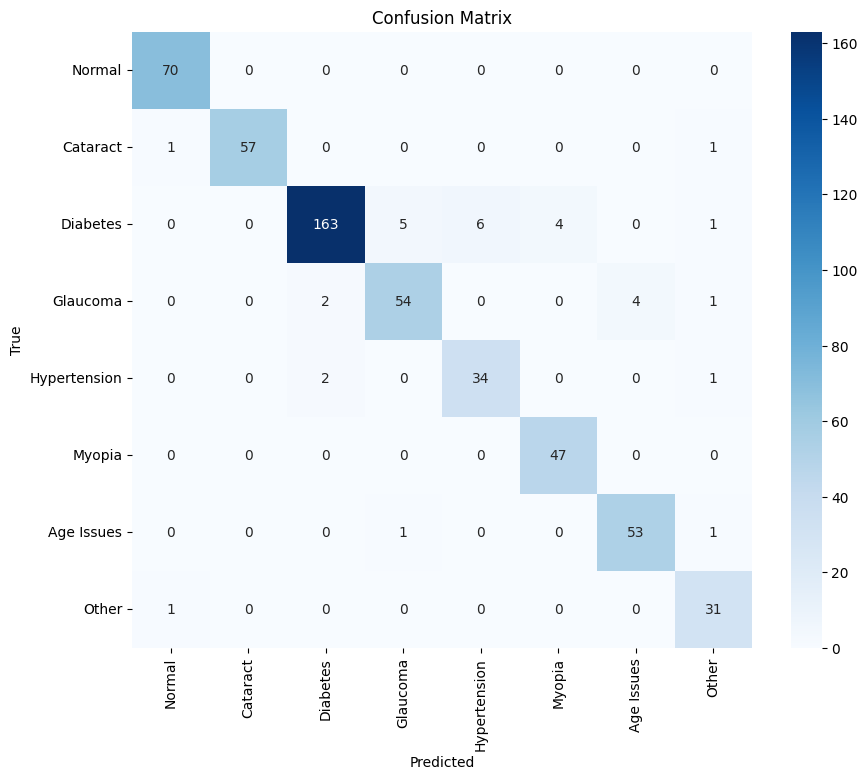

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

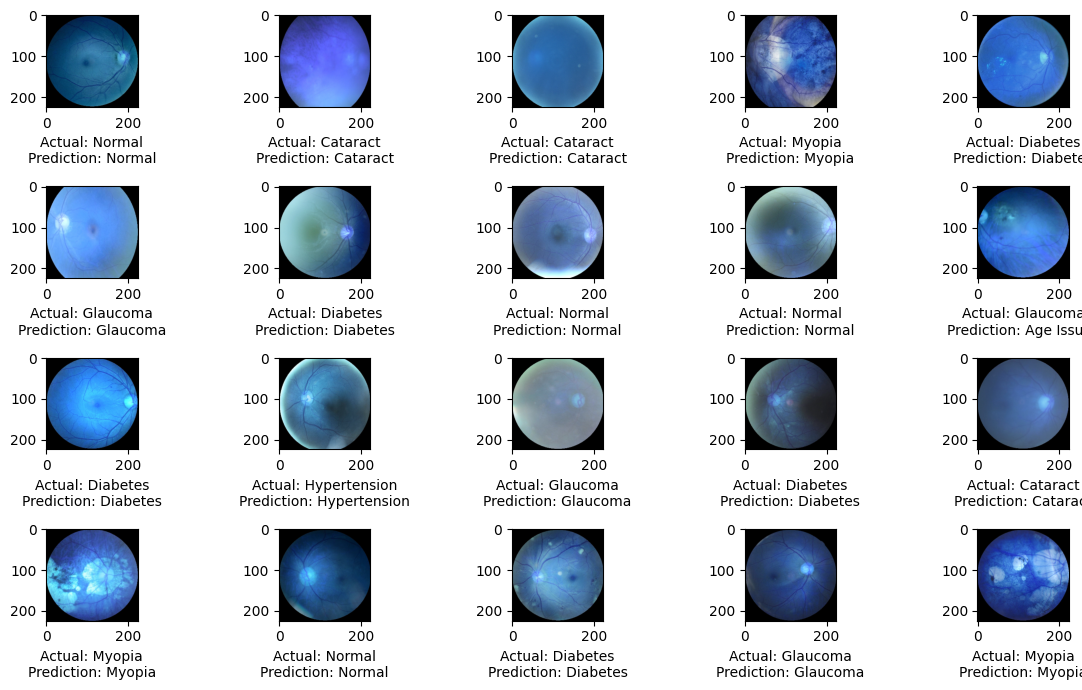

In [ ]:
# Visualize Predictions
plt.figure(figsize=(12, 7))
for i in range(20):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred_classes[sample]

    label = class_names[category]
    pred_label = class_names[pred_category]

    plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.xlabel(f"Actual: {label}\nPrediction: {pred_label}")
plt.tight_layout()
plt.show()

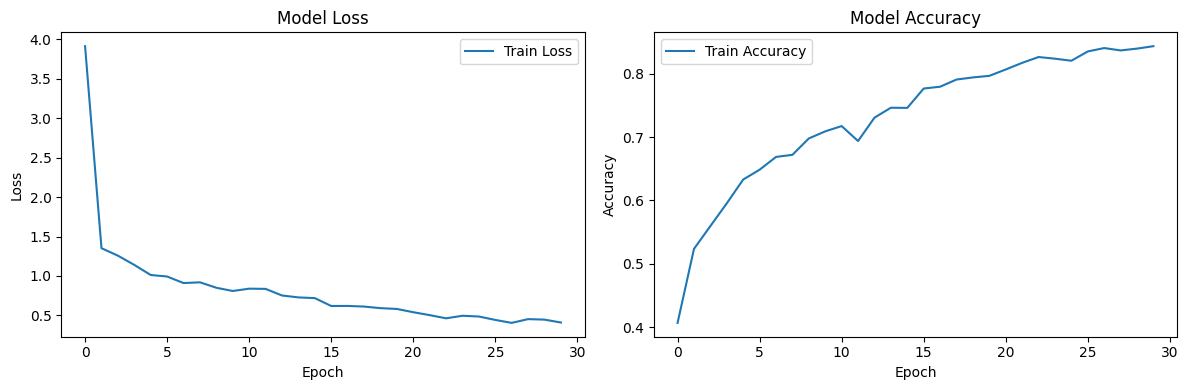

In [ ]:
# Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Save the final model
final_vgg19.save("ODIR_VGG19_kfold.h5")